# Document Representations

In natural language processing (NLP), document representation refers to the process of converting a document, which could be a piece of text or a collection of texts, into a numerical or computational form that can be easily utilized by machine learning algorithms. The goal is to capture the semantic meaning of the document in a way that allows algorithms to analyze and understand the content.

There are several methods for document representation in NLP, and each has its own strengths and weaknesses. Here are some commonly used techniques:

1. **Bag of Words (BoW):**
   - In BoW representation, a document is represented as an unordered set of words, disregarding grammar and word order but considering the frequency of each word.
   - Each word is assigned a unique index, and the document is represented as a vector where each element corresponds to the count of the respective word in the document.
   - BoW is simple and efficient but lacks the ability to capture word semantics and relationships.

2. **Term Frequency-Inverse Document Frequency (TF-IDF):**
   - TF-IDF is another popular method that takes into account both the frequency of a term in a document (TF) and its rarity across the entire dataset (IDF).
   - It assigns higher weights to terms that are frequent in a document but rare in the overall dataset, helping to identify important words specific to a document.

3. **Word Embeddings:**
   - Word embeddings represent words as dense vectors in a continuous vector space. Embeddings are pre-trained on large corpora and capture semantic relationships between words.
   - Techniques like Word2Vec, GloVe, and fastText generate embeddings that can be averaged or concatenated to represent a document. Doc2Vec extends these methods to capture document-level semantics.

4. **Doc2Vec:**
   - Doc2Vec extends Word2Vec to learn fixed-size representations for variable-length pieces of text, such as sentences or documents.
   - Each document is represented by a unique vector, and these vectors are trained to be similar for documents with similar content.

5. **Transformer-Based Models:**
   - Models like BERT (Bidirectional Encoder Representations from Transformers) and GPT (Generative Pre-trained Transformer) learn contextualized embeddings for words and can be fine-tuned for document-level tasks.
   - These models consider the context of each word within the document, capturing intricate relationships and nuances.

6. **Topic Models:**
   - Topic modeling techniques, such as Latent Dirichlet Allocation (LDA), aim to discover underlying topics in a collection of documents.
   - Documents are represented as a mixture of topics, and each topic is characterized by a distribution of words.

The choice of document representation method depends on the specific task, dataset, and the desired level of semantic understanding. Each method has its trade-offs in terms of computational complexity, interpretability, and effectiveness for different NLP applications.


# Bag of Words (BOW) Model

The Bag of Words (BoW) representation is a simple and widely used technique in natural language processing (NLP) for converting text data into numerical vectors. The basic idea behind BoW is to represent a document as an unordered set of words, disregarding grammar and word order, and focusing solely on the presence or absence of words along with their frequency. Here's a more detailed explanation of the Bag of Words representation:

1. **Tokenization:**
   - The first step in creating a Bag of Words representation is to tokenize the text. Tokenization involves breaking down the text into individual words or tokens. This process often involves removing punctuation and converting all words to lowercase to ensure consistency.

2. **Vocabulary Building:**
   - After tokenization, a vocabulary is created by compiling a unique set of words from the entire corpus (collection of documents). Each word in the vocabulary is assigned a unique index.

3. **Vectorization:**
   - Once the vocabulary is established, each document is represented as a numerical vector. The length of the vector is equal to the size of the vocabulary, and each element in the vector corresponds to the count of the respective word in the document.
   - For example, if the vocabulary is {cat, dog, the}, and the document is "the cat is on the mat," the BoW representation could be [2, 1, 3], indicating that "the" appears twice, "cat" appears once, and "dog" does not appear.

4. **Sparsity:**
   - BoW representations are often sparse because most documents contain only a small subset of the words present in the entire vocabulary. This sparsity can lead to efficient storage and computation.

5. **Document Comparison:**
   - BoW vectors allow for simple and efficient document comparison. Documents with similar word frequencies are likely to have similar BoW representations, even if the words appear in different orders. As a similarity measure, cosine between two document vectors is usually used.

6. **Limitations:**
   - BoW has limitations, especially in capturing the semantic meaning and context of words. It treats each word as independent and ignores word order, which can be crucial for understanding the meaning of a sentence.

7. **Extension: TF-IDF (Term Frequency-Inverse Document Frequency):**
   - To address the issue of equally treating all words, TF-IDF is often used as an extension of BoW. It weighs the importance of each word based on its frequency in the document (Term Frequency) and its rarity across the entire dataset (Inverse Document Frequency).

Despite its simplicity and limitations, the Bag of Words representation is a foundational technique in NLP and is still used in various applications, including sentiment analysis, text classification, and information retrieval. It serves as a baseline representation and is often combined with more advanced methods to improve performance on specific tasks.

## Example: Turkish Movie Reviews.

The dataset is taken from https://www.win.tue.nl/~mpechen/projects/smm/, where the Turkish Movie Reviews data set is publicly avaliable: https://www.win.tue.nl/~mpechen/projects/smm/Turkish_Movie_Sentiment.zip.


### Load Dataset

In [ ]:
!curl https://www.win.tue.nl/~mpechen/projects/smm/Turkish_Movie_Sentiment.zip -o ./Turkish_Movie_Sentiment.zip

In [ ]:
!unzip /content/Turkish_Movie_Sentiment.zip -d /content

> Load positive reviews from /content/tr_polarity.pos

> Load negative reviews from /content/tr_polarity.neg

> Each line in the review files is one review, so the list of reviews can be obtained by splitting the strings "reviews_pos" and "reviews_neg" w.r.t. linefeed char ```'\n'```.

In [ ]:
# Positive Reviews
import os;
with open("./tr_polarity.pos", 'rb') as f:
     review_pos_list = f.read().decode('iso-8859-9').replace('\r', '').split('\n');

# Negative Reviews
with open("./tr_polarity.neg", 'rb') as f:
     review_neg_list = f.read().decode('iso-8859-9').replace('\r', '').split('\n');


In [ ]:
print(f"First 5 positive reviews of total {len(review_pos_list)}:\n ", *review_pos_list[:5], sep="\n")
print(f"\n\nFirst 5 negative review of total {len(review_neg_list)}:\n ", *review_neg_list[:5], sep="\n")

We will use [pandas](https://pandas.pydata.org) for dataset operations using [DataFrame](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html), [Scikit-learn](https://scikit-learn.org/) for computing a confusion matrix,
seaborn for plotting a pairwise relationship in a dataset, and [matplotlib](https://matplotlib.org/) for creating visualizations.

In [ ]:
import pandas as pd
import sklearn.metrics as sk_metrics
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

We will use NLTK library for text preprocessing


In [ ]:
import nltk
nltk.download('punkt')

Convert positive and negative reviews to dataframe.

To do that, we first convert the reviews a list of list such that:

```
[ [1, 'review'], [1, 'review'], ..., [0, 'review'], [0, 'review'], ...]
```

In [ ]:
# Convert reviews to pandas dataframe
dataset = pd.DataFrame([[1, prev] for prev in review_pos_list] + [ [0, nrev] for nrev in review_neg_list] , columns=['label','review'])

dataset.info()

Tokenize the documents

In [ ]:
from nltk.tokenize import word_tokenize
import re

# Tokenize the 'review' column using NLTK
# also fix "text.text" typos by surrounding dots with space
dataset['review'] = dataset['review'].apply(lambda x: word_tokenize(re.sub(r'\.', ' . ', x)))

# Display the DataFrame with tokenized text
dataset

### Build Vocabulary

In [ ]:
total_tokens = 0
token_set = set([])
for index, tokens in dataset['review'].items():
  total_tokens += len(tokens)
  for token in tokens:
    token_set.add(token)

print(f"Corpus size: {total_tokens}, Vocabulary size: {len(token_set)}")

print(token_set)

### Vectorization of Movie Reviews:

   - Once the vocabulary is established, each document is represented as a numerical vector. The length of the vector is equal to the size of the vocabulary, and each element in the vector corresponds to the count of the respective word in the document.

   - For example, if the vocabulary is {cat, dog, the}, and the document is "the cat is on the mat," the BoW representation could be [2, 1, 3], indicating that "the" appears twice, "cat" appears once, and "dog" does not appear.

In [ ]:
# term-to-index mapping
term2idx={}
for idx, term in enumerate(token_set):
  term2idx.update({term:idx})

print(f"term-to-index mapping:\nSize: {len(term2idx)}\nterms and indices: {term2idx}")

In [ ]:
# Document vectors
vector_df = None
vocab_size = len(token_set)
doc_vectors = []
for _, row in dataset.iterrows():
  doc_vector = [0]*vocab_size # initial vector
  for token in row['review']:
    doc_vector[term2idx[token]] += 1
  doc_vectors.append([row['label'], doc_vector])

vector_df = pd.DataFrame(doc_vectors, columns=['label','vectors'])

In [ ]:
vector_df

### Train-Test Splits

In [ ]:
# Train dataset
train_dataset = vector_df.sample(frac=0.80, random_state=1)

In [ ]:
train_dataset

In [ ]:
len(train_dataset)

In [ ]:
train_dataset["label"].value_counts()

In [ ]:
# Test dataset
test_dataset = vector_df.drop(train_dataset.index)

In [ ]:
test_dataset

In [ ]:
len(test_dataset)

In [ ]:
test_dataset["label"].value_counts()

### Model Training

Here, we simply use aggregation (sum) of the review vectors for each sentiment category as the sentiment representation.

In [1]:
import numpy as np

# Aggregated vectors for positive & negative sentiments
V = len(token_set)
pos_vector = np.array([0] * V) # Initial positive sentiment vector
neg_vector = np.array([0] * V) # Initial negative sentiment vector

for _, row in train_dataset.iterrows():
  curr_review_vec = np.array(row['vectors'])
  if row['label'] == 0:
      neg_vector += curr_review_vec
  else:
      pos_vector += curr_review_vec


NameError: ignored

In [ ]:
print(f"positive sentiment vector of size: {len(pos_vector)}\n", pos_vector[:180])
print(f"negative sentiment vector of size: {len(neg_vector)}\n", neg_vector[:180])


### Similarity Measure: Cosine

Using cosine measure, classify each review in the **test** dataset, such that,

* if the review has a cosine similarity score to the reviews in **pos** training dataset, then mark the review as **pos**;

* otherwise, mark it as **neg**


In [ ]:
import numpy as np

def cosine_sim(vector1, vector2):
  # Calculate cosine similarity manually
  dot_product = np.dot(vector1, vector2) # dot product of the vectors
  magnitude1 = np.linalg.norm(vector1) # norm => length of vector1
  magnitude2 = np.linalg.norm(vector2) # # norm => length of vector2

  cosine_similarity = dot_product / (magnitude1 * magnitude2)
  return cosine_similarity


### Testing



In [ ]:
test_labels, test_vectors  = test_dataset.iloc[:,0], test_dataset.iloc[:,1]
test_labels.value_counts()
test_labels.values

In [ ]:
# make 10 predictions
for idx, vector in enumerate(test_vectors):
  pos_sim = cosine_sim(np.array(vector), pos_vector)
  neg_sim = cosine_sim(np.array(vector), neg_vector)

  print(f"Pos sim: {pos_sim}, Neg sim: {neg_sim}")
  if (pos_sim > neg_sim):
    print(f"{idx+1}th predicted sentiment: 1, actual sentiment: {test_labels.values[idx]}\n")
  else:
    print(f"{idx+1}th predicted sentiment: 0, actual sentiment: {test_labels.values[idx]}\n")
  if idx > 10:
    break

In [ ]:
# make all predictions
predicted_labels = []
for vector in test_vectors:
  pos_sim = cosine_sim(np.array(vector), pos_vector)
  neg_sim = cosine_sim(np.array(vector), neg_vector)
  predicted_labels.append((1 if pos_sim > neg_sim else 0))

In [ ]:
# Check predictions
len(predicted_labels)

In [ ]:
import sklearn.metrics as sk_metrics
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

def show_confusion_matrix(pred_values, true_values, typ):
  # Compute the confusion matrix and normalize it
  plt.figure(figsize=(10,10))
  confusion = sk_metrics.confusion_matrix(pred_values, true_values)
  confusion_normalized = confusion / confusion.sum(axis=1, keepdims=True)
  axis_labels = range(2)
  ax = sns.heatmap(
      confusion_normalized, xticklabels=axis_labels, yticklabels=axis_labels,
      cmap='Blues', annot=True, fmt='.4f', square=True)
  plt.title(f"Confusion matrix: {typ}")
  plt.ylabel("True label")
  plt.xlabel("Predicted label")
  return confusion

In [ ]:
conf_matrix = show_confusion_matrix(predicted_labels, test_labels, 'Testing')

### Evaluation
---
Count the number of *true-positives*, *false-positives*, *true-negatives* and *false-negatives*.

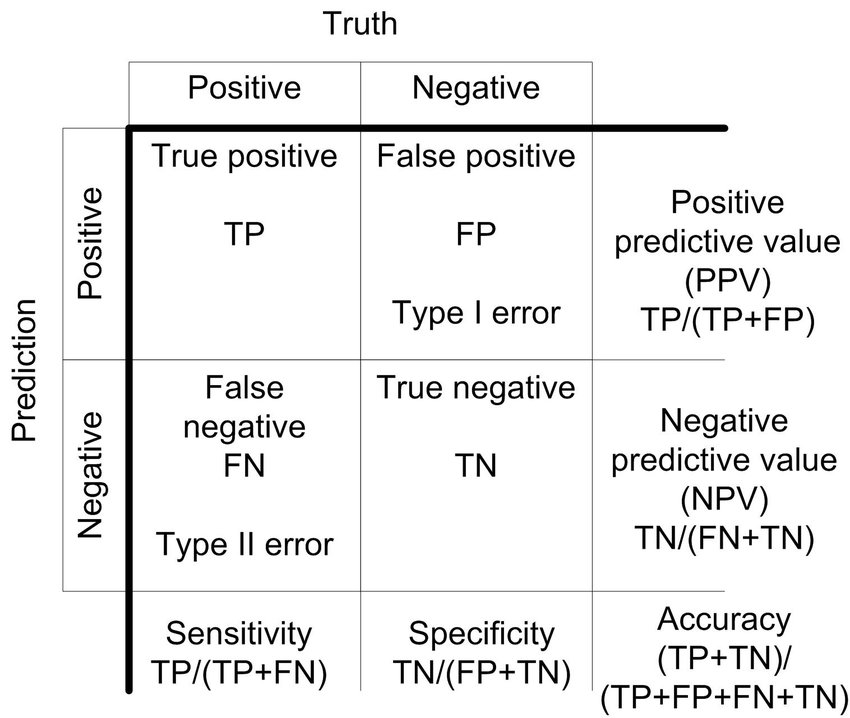



In [ ]:
# Calculate accuracy from confusion matrix
# in confusion matrix

TP = conf_matrix[1,1] # predicted_label: 1, true_label:1
FP = conf_matrix[1,0] # predicted_label: 1, true_label:0
FN = conf_matrix[0,1] # predicted_label: 0, true_label:1
TN = conf_matrix[0,0] # predicted_label: 0, true_label:0

accuracy = (TP + TN) / (TP + FP + FN + TN)

print(f"Accuracy of the model: {accuracy:.2f}")

# TF-IDF Weighted Vectorization

Term Frequency-Inverse Document Frequency (**TF-IDF**) is a numerical statistic that reflects the importance of a term (word) in a document relative to a collection of documents (corpus). TF-IDF is commonly used in information retrieval and natural language processing to highlight words that are distinctive and relevant to a particular document within a larger set of documents. It aims to overcome the limitations of simple word frequency measures like Term Frequency (TF).

### TF-IDF Components:

1. **Term Frequency (TF):**
   - Term Frequency measures how often a term appears in a document.
   - It is calculated as the ratio of the number of times a term $t$ appears in a document $d$ to the total number of terms in $d$.
   
   $$ \text{TF}(t, d) = \frac{\text{Number of occurrences of term } t \text{ in document } d}{\text{Total number of terms in document } d} $$

2. **Inverse Document Frequency (IDF):**
   - Inverse Document Frequency measures the importance of a term across the entire document corpus.
   - It is calculated as the logarithm of the ratio of the total number of documents $N$ to the number of documents containing the term $t$.

   $$ \text{IDF}(t, D) = \log\left(\frac{N}{\text{Number of documents containing term } t}\right) $$

### TF-IDF Formula:

The TF-IDF score for a term $t$ in a document $d$ is given by the product of its Term Frequency and Inverse Document Frequency:

$$\text{TF-IDF}(t, d, D) = \text{TF}(t, d) \times \text{IDF}(t, D) $$

### TF-IDF Calculation in Practice:

In practice, the TF-IDF score for each term in a document is calculated, resulting in a TF-IDF vector for that document. These vectors can be used to represent documents in a high-dimensional space where each dimension corresponds to a unique term in the entire corpus. The TF-IDF values emphasize terms that are frequent in a particular document but not common across the entire corpus, making them useful for tasks such as document retrieval, information filtering, and text mining.

### Implementation using scikit-learn:

Here's a brief example of using scikit-learn to compute TF-IDF scores for a collection of documents:

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = ["This is document 1.", "This is document 2.", "Another document here."]

vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(corpus)

# Get feature names (terms)
terms = vectorizer.get_feature_names_out()

# Get TF-IDF values for each term in the first document
tfidf_values = tfidf_matrix[0].toarray()[0]

# Display the results
print("Feature names:", terms)
print("TF-IDF values for the first document:", tfidf_values)

In this example, `TfidfVectorizer` is used to compute the TF-IDF values for the given corpus. The resulting `tfidf_matrix` contains the TF-IDF vectors for each document in the corpus.

Nevertheless, we can implement TF-IDF vectorization without external libraries.

The statistics we need:

* Frequency of each term in documents, $TF$
* Length of each document in the corpus, $N$
* Document Frequency, which is the number of documents that each term appears, $DF$

## Note: Reset the runtime first

## Load Dataset

In [ ]:
!curl https://www.win.tue.nl/~mpechen/projects/smm/Turkish_Movie_Sentiment.zip -o ./Turkish_Movie_Sentiment.zip

In [ ]:
!unzip /content/Turkish_Movie_Sentiment.zip -d /content

In [ ]:
# Positive Reviews
import os;
with open("./tr_polarity.pos", 'rb') as f:
     review_pos_list = f.read().decode('iso-8859-9').replace('\r', '').split('\n');

# Negative Reviews
with open("./tr_polarity.neg", 'rb') as f:
     review_neg_list = f.read().decode('iso-8859-9').replace('\r', '').split('\n');


In [ ]:
print(f"First 5 positive reviews of total {len(review_pos_list)}:\n ", *review_pos_list[:5], sep="\n")
print(f"\n\nFirst 5 negative review of total {len(review_neg_list)}:\n ", *review_neg_list[:5], sep="\n")

In [ ]:
import pandas as pd
import sklearn.metrics as sk_metrics
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
import nltk
nltk.download('punkt')

Convert positive and negative reviews to dataframe.

To do that, we first convert the reviews a list of list such that:

```
[ [1, 'review'], [1, 'review'], ..., [0, 'review'], [0, 'review'], ...]
```

In [ ]:
# Convert reviews to pandas dataframe
dataset = pd.DataFrame([[1, prev] for prev in review_pos_list] + [ [0, nrev] for nrev in review_neg_list] , columns=['label','review'])

dataset.info()

In [ ]:
# Tokenize the 'review' column using NLTK
from nltk.tokenize import word_tokenize
import re

# also fix "text.text" typos by surrounding dots with space
dataset['review'] = dataset['review'].apply(lambda x: word_tokenize(re.sub(r'\.', ' . ', x)))

# Display the DataFrame with tokenized text
dataset

In [ ]:
# Build Vocabulary
total_tokens = 0
token_set = set([])
for index, tokens in dataset['review'].items():
  total_tokens += len(tokens)
  for token in tokens:
    token_set.add(token)

print(f"Corpus size: {total_tokens}, Vocabulary size: {len(token_set)}")

print(token_set)

### Vectorization of Movie Reviews:

   - Once the vocabulary is established, each document is represented as a numerical vector. The length of the vector is equal to the size of the vocabulary.
   
   > In count vectorization, each element in the vector corresponds to the count of the respective word in the document. That is, counts corresponds to the TF in TF-IDF.

   > In this time, in TF-IDF vectorization, we use TF-IDF values instead of just the TF.  

In [ ]:
# term-to-index mapping
term2idx={}
for idx, term in enumerate(token_set):
  term2idx.update({term:idx})

print(f"term-to-index mapping:\nSize: {len(term2idx)}\nterms and indices: {term2idx}")

Collect statistics:

* Frequency of each term in documents, $TF$
* Length of each document in the corpus, $dl$
* Document Frequency, which is the number of documents that each term appears, $DF$

In [ ]:
# Lenght of each document,
# Store as a column in dataframe
doc_lengths = []
dataset['length'] = dataset['review'].apply(lambda x: len(x))

dataset

In [ ]:
# TF and DF values
V = len(token_set) # size of vocabulary
N = dataset.shape[0] # total number of documents in the corpus

# DF values
term_DFs = [0] * V

# store TF values as a term-by-document matrix
term_by_document = np.zeros((V, N))

for doc_idx, row in dataset.iterrows():

  # Aggragate DF counts
  doc_token_set = set(row["review"])
  for token in doc_token_set:
    term_idx = term2idx[token]
    term_DFs[term_idx] += 1

  # Aggragate TF counts
  for token in row["review"]:
    term_idx = term2idx[token]
    term_by_document[term_idx, doc_idx] += 1

In [ ]:
print(term_DFs)
print(term_by_document)

In [ ]:
import math

def get_tfidf(term_index, doc_idx, doc_length):
  tf = term_by_document[term_idx, doc_idx]
  idf = math.log(N / doc_length)
  return tf * idf

In [ ]:
# Document vectors
vector_df = None
vocab_size = len(token_set)
doc_vectors = []
for doc_idx, row in dataset.iterrows():
  doc_vector = [0]*vocab_size # initial vector
  doc_tokens = set(row['review'])
  for token in doc_tokens:
    term_idx = term2idx[token]
    doc_vector[term_idx] += get_tfidf(term_idx, doc_idx, row['length'])
  doc_vectors.append([row['label'], doc_vector])

vector_df = pd.DataFrame(doc_vectors, columns=['label','vectors'])

In [ ]:
vector_df

### Train-Test Splits

In [ ]:
# Train dataset
train_dataset = vector_df.sample(frac=0.80, random_state=1)

In [ ]:
train_dataset

In [ ]:
train_dataset["label"].value_counts()

In [ ]:
# Test dataset
test_dataset = vector_df.drop(train_dataset.index)

In [ ]:
test_dataset

In [ ]:
test_dataset["label"].value_counts()

### Model Training

Here, we simply use aggregation (sum) of the review vectors for each sentiment category as the sentiment representation.

In [ ]:
import numpy as np

# Aggregated vectors for positive & negative sentiments
V = len(token_set)
pos_vector = np.array([0.0] * V) # Initial positive sentiment vector
neg_vector = np.array([0.0] * V) # Initial negative sentiment vector

for _, row in train_dataset.iterrows():
  curr_review_vec = np.array(row['vectors'])
  if row['label'] == 0:
      neg_vector += curr_review_vec
  else:
      pos_vector += curr_review_vec


In [ ]:
print(f"positive sentiment vector of size: {len(pos_vector)}\n", pos_vector[:180])
print(f"negative sentiment vector of size: {len(neg_vector)}\n", neg_vector[:180])

### Similarity Measure: Cosine

Using cosine measure, classify each review in the **test** dataset, such that,

* if the review has a cosine similarity score to the reviews in **pos** training dataset, then mark the review as **pos**;

* otherwise, mark it as **neg**


In [ ]:
import numpy as np

def cosine_sim(vector1, vector2):
  # Calculate cosine similarity manually
  dot_product = np.dot(vector1, vector2) # dot product of the vectors
  magnitude1 = np.linalg.norm(vector1) # norm => length of vector1
  magnitude2 = np.linalg.norm(vector2) # # norm => length of vector2

  cosine_similarity = dot_product / (magnitude1 * magnitude2)
  return cosine_similarity


### Testing



In [ ]:
test_labels, test_vectors  = test_dataset.iloc[:,0], test_dataset.iloc[:,1]
print(test_labels.value_counts())
print(test_labels.values)

In [ ]:
# make 10 predictions
for idx, vector in enumerate(test_vectors):
  pos_sim = cosine_sim(np.array(vector), pos_vector)
  neg_sim = cosine_sim(np.array(vector), neg_vector)

  print(f"Pos sim: {pos_sim}, Neg sim: {neg_sim}")
  if (pos_sim > neg_sim):
    print(f"{idx+1}th predicted sentiment: 1, actual sentiment: {test_labels.values[idx]}\n")
  else:
    print(f"{idx+1}th predicted sentiment: 0, actual sentiment: {test_labels.values[idx]}\n")
  if idx > 10:
    break

In [ ]:
# make all predictions
predicted_labels = []
for vector in test_vectors:
  pos_sim = cosine_sim(np.array(vector), pos_vector)
  neg_sim = cosine_sim(np.array(vector), neg_vector)
  predicted_labels.append((1 if pos_sim > neg_sim else 0))

In [ ]:
# Check predictions
len(predicted_labels)

In [ ]:
import sklearn.metrics as sk_metrics
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

def show_confusion_matrix(pred_values, true_values, typ):
  # Compute the confusion matrix and normalize it
  plt.figure(figsize=(10,10))
  confusion = sk_metrics.confusion_matrix(pred_values, true_values)
  confusion_normalized = confusion / confusion.sum(axis=1, keepdims=True)
  axis_labels = range(2)
  ax = sns.heatmap(
      confusion_normalized, xticklabels=axis_labels, yticklabels=axis_labels,
      cmap='Blues', annot=True, fmt='.4f', square=True)
  plt.title(f"Confusion matrix: {typ}")
  plt.ylabel("True label")
  plt.xlabel("Predicted label")
  return confusion

In [ ]:
conf_matrix = show_confusion_matrix(predicted_labels, test_labels, 'Testing')

### Evaluation
---
Count the number of *true-positives*, *false-positives*, *true-negatives* and *false-negatives*.

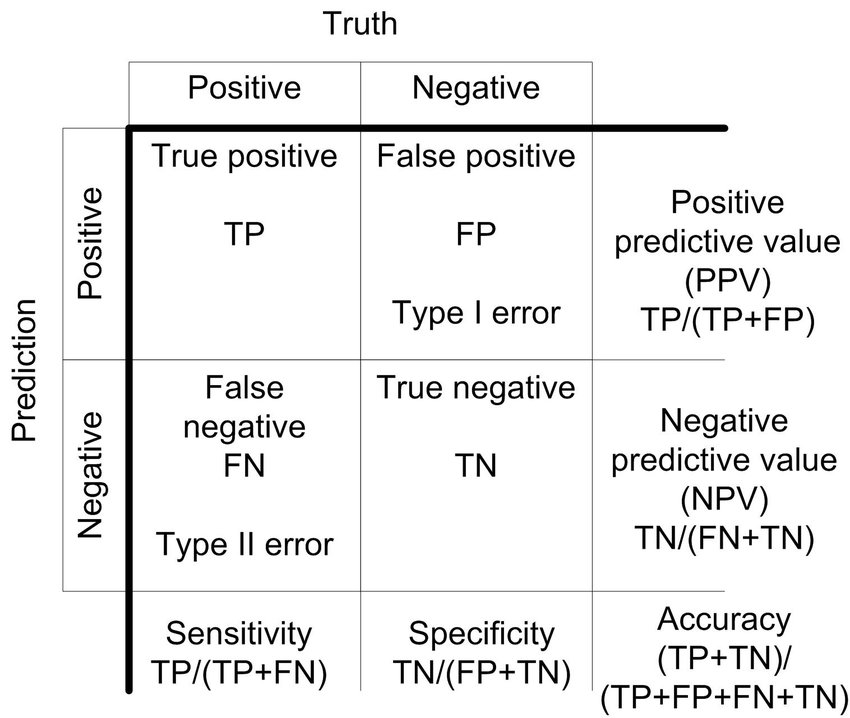



In [ ]:
# Calculate accuracy from confusion matrix
# in confusion matrix

TP = conf_matrix[1,1] # predicted_label: 1, true_label:1
FP = conf_matrix[1,0] # predicted_label: 1, true_label:0
FN = conf_matrix[0,1] # predicted_label: 0, true_label:1
TN = conf_matrix[0,0] # predicted_label: 0, true_label:0

accuracy = (TP + TN) / (TP + FP + FN + TN)

print(f"Accuracy of the model: {accuracy:.2f}")

# Word Embeddings
Word embeddings are dense vector representations of words in a continuous vector space, where the semantic meaning of words is captured based on their context. Word embeddings have become a fundamental technique in natural language processing (NLP) and have proven effective in various NLP tasks such as language modeling, sentiment analysis, machine translation, and more.

### Key Concepts and Techniques:

1. **Distributional Hypothesis:**
   - Word embeddings are grounded in the distributional hypothesis, which suggests that words appearing in similar contexts tend to have similar meanings. In other words, the meaning of a word can be inferred from the context in which it appears.

2. **Training Models:**
   - Word embeddings are often learned by training neural network models on large amounts of text data. The context of a word is used to predict its neighboring words, and the weights of the neural network are adjusted during training to learn meaningful representations.

3. **Word2Vec:**
   - Word2Vec is one of the pioneering models for learning word embeddings. It introduces two architectures: Continuous Bag of Words (CBOW) and Skip-Gram. CBOW predicts a target word based on its context, while Skip-Gram predicts surrounding words given a target word.

4. **GloVe (Global Vectors for Word Representation):**
   - GloVe is another popular word embedding model that focuses on the global statistical information of word co-occurrences. It constructs a word-word co-occurrence matrix and factorizes it to obtain word embeddings.

5. **Embedding Layers in Neural Networks:**
   - Word embeddings are often used as the first layer in neural networks for NLP tasks. This layer transforms input words into dense vectors, and the network learns to adjust the embeddings during training to improve task performance.

### Properties of Word Embeddings:

1. **Semantic Similarity:**
   - Words with similar meanings are expected to have similar vector representations, and their cosine similarity in the embedding space is high.

2. **Analogies:**
   - Word embeddings often exhibit interesting properties, such as the ability to solve analogies. For example, the vector representation of "king" minus "man" plus "woman" is close to the vector representation of "queen."

3. **Contextual Information:**
   - Word embeddings capture contextual information, allowing them to represent words differently based on the context in which they appear.

### Pre-trained Word Embeddings:

Many pre-trained word embeddings are available, trained on large corpora, which can be used for downstream tasks without the need for retraining. Examples include Word2Vec models, GloVe embeddings, and embeddings from transformer-based models like BERT and GPT.

### Use Cases:

Word embeddings find applications in various NLP tasks, including:

- **Text Classification:** Learning document representations.
- **Named Entity Recognition (NER):** Identifying entities in text.
- **Machine Translation:** Translating text between languages.
- **Information Retrieval:** Finding relevant documents.
- **Question Answering:** Understanding and answering questions.

Word embeddings have greatly contributed to the effectiveness of NLP models by providing rich, semantic representations of words that capture their contextual relationships.


## Word2Vec

Word2Vec is a popular technique for learning distributed representations of words, often referred to as word embeddings, in a continuous vector space. Developed by a team at Google led by Tomas Mikolov, Word2Vec is based on the idea that words with similar meanings should have similar representations. Word embeddings generated by Word2Vec capture semantic relationships between words and are useful in various natural language processing (NLP) applications.

### Key Concepts in Word2Vec:

1. **Continuous Bag of Words (CBOW) and Skip-Gram:**
   - Word2Vec includes two main architectures: CBOW and Skip-Gram.
   - **CBOW:** Predicts a target word based on its context (surrounding words).
   - **Skip-Gram:** Predicts surrounding words given a target word.
   - Both architectures use a neural network to learn the relationships between words.

2. **Neural Network Architecture:**
   - The neural network in Word2Vec has an input layer, a hidden layer (projection layer), and an output layer.
   - The input layer represents words as one-hot encoded vectors (high-dimensional vectors with a single '1' at the index corresponding to the word's position in the vocabulary).
   - The hidden layer is a projection layer that transforms the high-dimensional input into a lower-dimensional space.
   - The output layer is a softmax layer that produces probabilities for words in the vocabulary.

3. **Negative Sampling:**
   - Negative sampling is a technique used to speed up the training of Word2Vec models.
   - Instead of adjusting weights for all words in the vocabulary, negative sampling randomly selects a small number of negative samples (words not in the context) to update weights, making the training process more efficient.

### Word Embedding Properties:

1. **Semantic Relationships:**
   - Word embeddings generated by Word2Vec often exhibit semantic relationships. For example, the vector for "king" minus "man" plus "woman" is close to the vector for "queen."

2. **Vector Arithmetic:**
   - Word embeddings enable vector arithmetic operations. For instance, subtracting the vector for "France" from "Paris" and adding "Italy" yields a vector close to the vector for "Rome."



## CBOW and SkipGrams

Continuous Bag of Words (CBOW) and Skip-Gram are two architectures used in the Word2Vec model, a popular technique for learning word embeddings. Both models are designed to capture semantic relationships between words by learning distributed representations of words in a continuous vector space.

### Continuous Bag of Words (CBOW):

1. **Objective:**
   - CBOW aims to predict the target word based on its context, which consists of surrounding words.
   - The input to the model is a context window of words, and the output is the target word.

2. **Input Representation:**
   - The input layer of CBOW represents the context words using one-hot encoded vectors.
   - The context window is defined by a fixed number of words before and after the target word.

3. **Hidden Layer (Projection Layer):**
   - The hidden layer is a projection layer that transforms the high-dimensional one-hot encoded input vectors into a lower-dimensional continuous vector space.
   - The weights connecting the input layer to the hidden layer serve as word embeddings.

4. **Output Layer:**
   - The output layer uses a softmax activation function to produce probabilities for each word in the vocabulary.
   - The target word is selected based on these probabilities.

5. **Objective Function:**
   - CBOW minimizes the negative log-likelihood of the observed target word given its context.

### Skip-Gram:

1. **Objective:**
   - Skip-Gram aims to predict the surrounding words (context) given the target word.
   - The input to the model is the target word, and the output is the context words.

2. **Input Representation:**
   - The input layer of Skip-Gram represents the target word using a one-hot encoded vector.

3. **Hidden Layer (Projection Layer):**
   - The hidden layer is a projection layer that transforms the high-dimensional one-hot encoded input vector into a continuous vector space.
   - The weights connecting the input layer to the hidden layer serve as word embeddings.

4. **Output Layer:**
   - The output layer uses a softmax activation function to produce probabilities for each word in the vocabulary.
   - The context words are selected based on these probabilities.

5. **Objective Function:**
   - Skip-Gram minimizes the negative log-likelihood of the observed context words given the target word.

### Comparison:

- **CBOW vs. Skip-Gram:**
  - CBOW is often faster to train and tends to perform well on frequent words.
  - Skip-Gram is more effective for infrequent words and captures better semantic relationships between words.

- **Training Efficiency:**
  - CBOW requires predicting a single target word from a context, making it computationally efficient.
  - Skip-Gram requires predicting multiple context words from a single target word, making it computationally more expensive.

- **Application:**
  - CBOW is often used in scenarios where the context is relatively consistent and the goal is to predict a missing word.
  - Skip-Gram is suitable when the context can vary, and the goal is to understand the relationships between a target word and its various contexts.

Both CBOW and Skip-Gram have proven effective in capturing word semantics, and the choice between them often depends on the specific characteristics of the dataset and the task at hand. In practice, Skip-Gram is more commonly used due to its ability to capture fine-grained semantic relationships.

### Implementation using Gensim:

Here's a simple example of using Word2Vec with the Gensim library:

In [ ]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize  # You may need to install nltk and download punkt

# Example sentences
sentences = [
    "Word embeddings are fascinating.",
    "Natural language processing is an exciting field."
]

# Tokenize sentences
tokenized_sentences = [word_tokenize(sentence.lower()) for sentence in sentences]

# CBOW model
cbow_model = Word2Vec(sentences=tokenized_sentences, vector_size=100, window=5, min_count=1, workers=4, sg=0)

# Skip-Gram model
skipgram_model = Word2Vec(sentences=tokenized_sentences, vector_size=100, window=5, min_count=1, workers=4, sg=1)

# Access word embeddings
word_embedding_cbow = cbow_model.wv['fascinating']
word_embedding_skipgram = skipgram_model.wv['fascinating']

# Print word embeddings
print("CBOW Word Embedding for 'fascinating':\n", word_embedding_cbow)
print("Skip-Gram Word Embedding for 'fascinating':\n", word_embedding_skipgram)


In this example:
- We use Gensim to train a Word2Vec model on a small dataset of sentences.
- The `vector_size` parameter determines the dimensionality of the word embeddings.
- The `window` parameter sets the maximum distance between the current and predicted word within a sentence.
- The `min_count` parameter ignores words with a total frequency lower than the specified value.
- The `workers` parameter controls the number of CPU cores used for training.

- $sg=0$ specifies CBOW (Continuous Bag of Words).

- $sg=1$ specifies Skip-Gram.

This is a basic example, and Word2Vec models are often trained on much larger corpora for better performance. Additionally, the choice of parameters may depend on the characteristics of the dataset.

## Word2Vec embeddings for Turkish Movie Sentiments

In [ ]:
!curl https://www.win.tue.nl/~mpechen/projects/smm/Turkish_Movie_Sentiment.zip -o ./Turkish_Movie_Sentiment.zip

In [ ]:
!unzip /content/Turkish_Movie_Sentiment.zip -d /content

In [ ]:
import nltk
nltk.download('punkt')

In [ ]:
# Generator for corpus read
import smart_open
import gensim
import re
from nltk.tokenize import word_tokenize

def read_corpus(fname, tokens_only=False):
    with smart_open.open(fname, encoding="iso-8859-9") as f:
        for i, line in enumerate(f):
            tokens = word_tokenize(re.sub('[\n\r\.]', ' ', line))
            if tokens_only:
                yield tokens
            else:
                # For training data, add tags
                yield gensim.models.doc2vec.TaggedDocument(tokens, [i])


In [ ]:
# Convert reviews to pandas dataframe
import pandas as pd

review_pos_list = read_corpus("./tr_polarity.pos", tokens_only=True);
review_neg_list = read_corpus("./tr_polarity.neg", tokens_only=True);

pos_reviews = [ [1, prev] for prev in review_pos_list];
neg_reviews = [ [0, nrev] for nrev in review_neg_list]
dataset = pd.DataFrame(pos_reviews + neg_reviews, columns=['label','review'])

dataset.info()

In [ ]:
dataset

In [ ]:
# Embeddings for Positive Reviews
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize

doc_vector_size=200

# Tokenize reviews
pos_filter = dataset['label'] == 1
dataset_filtered = dataset[pos_filter]
tokenized_reviews = [review for _ , review in dataset_filtered['review'].items()]

# Train Word2Vec model
pos_model = Word2Vec(sentences=tokenized_reviews, vector_size=doc_vector_size, window=5, min_count=1, workers=2, sg=0, seed=5)

In [ ]:
# Access positive word embeddings
word = "harika"
word_embedding = pos_model.wv[word]

# Find similar words
similar_words = pos_model.wv.most_similar(word, topn=5)

print(f"Word Embedding for {word}:\n", word_embedding)
print(f"Similar Words to {word}:\n", similar_words)

In [ ]:
# Embeddings for Negative Reviews
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize

# Tokenize negative review
pos_filter = dataset['label'] == 0
dataset_filtered = dataset[pos_filter]
tokenized_reviews = [review for _ , review in dataset_filtered['review'].items()]

# Train Word2Vec model
neg_model = Word2Vec(sentences=tokenized_reviews, vector_size=doc_vector_size, window=5, min_count=1, workers=4, sg=0, seed=5)

In [ ]:
# Access negative word embeddings
word = "berbat"
word_embedding = neg_model.wv[word]

# Find similar words
similar_words = neg_model.wv.most_similar(word, topn=5)

print(f"Word Embedding for {word}:\n", word_embedding)
print(f"Similar Words to {word}:\n", similar_words)

## Document Embeddings (Doc2Vec): Average of Word2Vec Vectors

Techniques like Word2Vec and GloVe generate embeddings that can be averaged or concatenated to represent a document.

In [ ]:
# Returns Doc2Vec by averagind word2vec embeddings
def get_doc2vec(doc_tokens, word_embedding_model):
  doc_embedding = np.array([0.0] * doc_vector_size)
  n = len(doc_tokens) * 1.0
  for token in doc_tokens:
    doc_embedding += word_embedding_model.wv[token]/n
  return doc_embedding

In [ ]:
# Document vectors
vector_df = None
doc_vectors = []
for _, row in dataset.iterrows():
  doc_vector = get_doc2vec(row['review'], (pos_model if row['label'] == 1 else neg_model))
  doc_vectors.append([row['label'], doc_vector])

vector_df = pd.DataFrame(doc_vectors, columns=['label','vectors'])

In [ ]:
vector_df

### Train-Test Splits

In [ ]:
# Train dataset
train_dataset = vector_df.sample(frac=0.80, random_state=1)

In [ ]:
train_dataset

In [ ]:
train_dataset["label"].value_counts()

In [ ]:
# Test dataset
test_dataset = vector_df.drop(train_dataset.index)

In [ ]:
test_dataset

In [ ]:
test_dataset["label"].value_counts()

### Model Training

Here, we simply use aggregation (sum) of the review vectors for each sentiment category as the sentiment representation.

In [ ]:
import numpy as np

# Aggregated vectors for positive & negative sentiments
pos_vector = np.array([0.0] * doc_vector_size) # Initial positive sentiment vector
neg_vector = np.array([0.0] * doc_vector_size) # Initial negative sentiment vector

n_pos = 0
n_neg = 0
for _, row in train_dataset.iterrows():
  curr_review_vec = np.array(row['vectors'])
  if row['label'] == 0:
      neg_vector += curr_review_vec
      n_neg += 1
  else:
      pos_vector += curr_review_vec
      n_pos += 1

neg_vector = neg_vector / n_neg
pos_vector = pos_vector / n_pos

In [ ]:
print(f"First 100 component values for positive sentiment vector of size {len(pos_vector)}\n", pos_vector[:100])
print(f"First 100 component values for negative sentiment vector of size {len(neg_vector)}\n", neg_vector[:100])


### Similarity Measure: Cosine

Using cosine measure, classify each review in the **test** dataset, such that,

* if the review has a cosine similarity score to the reviews in **pos** training dataset, then mark the review as **pos**;

* otherwise, mark it as **neg**


In [ ]:
import numpy as np

def cosine_sim(vector1, vector2):
  # Calculate cosine similarity manually
  dot_product = np.dot(vector1, vector2) # dot product of the vectors
  magnitude1 = np.linalg.norm(vector1) # norm => length of vector1
  magnitude2 = np.linalg.norm(vector2) # # norm => length of vector2

  cosine_similarity = dot_product / (magnitude1 * magnitude2)
  return cosine_similarity


### Testing



In [ ]:
test_labels, test_vectors  = test_dataset.iloc[:,0], test_dataset.iloc[:,1]
print(test_labels.value_counts())
print(test_labels.values)

In [ ]:
# make 10 predictions
for idx, vector in enumerate(test_vectors):
  pos_sim = cosine_sim(np.array(vector), pos_vector)
  neg_sim = cosine_sim(np.array(vector), neg_vector)

  print(f"Pos sim: {pos_sim}, Neg sim: {neg_sim}")
  if (pos_sim > neg_sim):
    print(f"{idx+1}th predicted sentiment: 1, actual sentiment: {test_labels.values[idx]}\n")
  else:
    print(f"{idx+1}th predicted sentiment: 0, actual sentiment: {test_labels.values[idx]}\n")
  if idx > 10:
    break

In [ ]:
# make all predictions
predicted_labels = []
for vector in test_vectors:
  pos_sim = cosine_sim(np.array(vector), pos_vector)
  neg_sim = cosine_sim(np.array(vector), neg_vector)
  predicted_labels.append((1 if pos_sim > neg_sim else 0))

In [ ]:
# Check predictions
len(predicted_labels)

In [ ]:
import sklearn.metrics as sk_metrics
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

def show_confusion_matrix(pred_values, true_values, typ):
  # Compute the confusion matrix and normalize it
  plt.figure(figsize=(10,10))
  confusion = sk_metrics.confusion_matrix(pred_values, true_values)
  confusion_normalized = confusion / confusion.sum(axis=1, keepdims=True)
  axis_labels = range(2)
  ax = sns.heatmap(
      confusion_normalized, xticklabels=axis_labels, yticklabels=axis_labels,
      cmap='Blues', annot=True, fmt='.4f', square=True)
  plt.title(f"Confusion matrix: {typ}")
  plt.ylabel("True label")
  plt.xlabel("Predicted label")
  return confusion

In [ ]:
conf_matrix = show_confusion_matrix(predicted_labels, test_labels, 'Testing')

### Evaluation
---
Count the number of *true-positives*, *false-positives*, *true-negatives* and *false-negatives*.

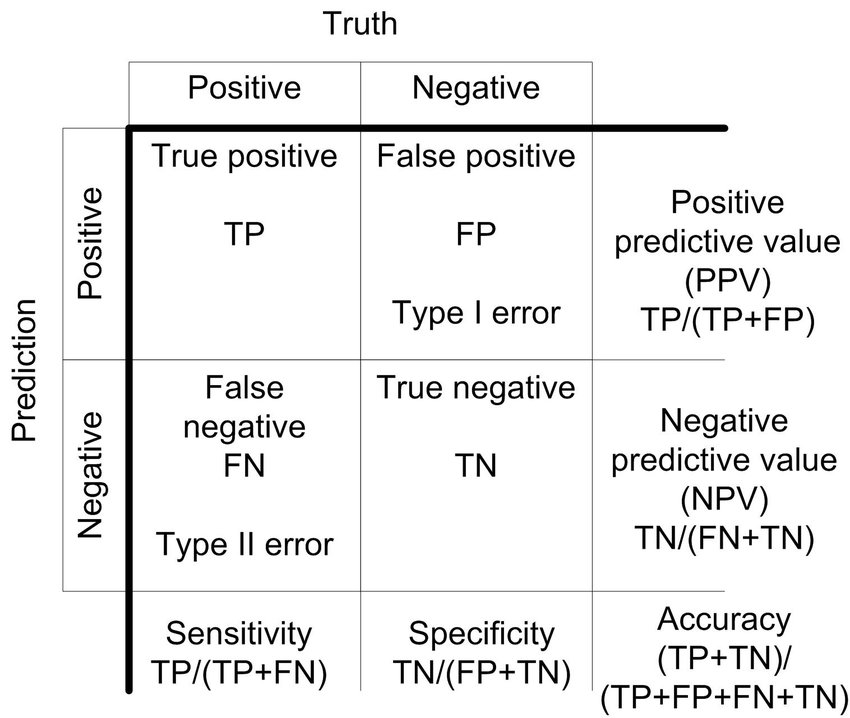



In [ ]:
# Calculate accuracy from confusion matrix
# in confusion matrix

TP = conf_matrix[1,1] # predicted_label: 1, true_label:1
FP = conf_matrix[1,0] # predicted_label: 1, true_label:0
FN = conf_matrix[0,1] # predicted_label: 0, true_label:1
TN = conf_matrix[0,0] # predicted_label: 0, true_label:0

accuracy = (TP + TN) / (TP + FP + FN + TN)

print(f"Accuracy of the model: {accuracy:.2f}")

# Doc2Vec

Doc2Vec, also known as Paragraph Vectors, is an unsupervised algorithm for generating fixed-size vector representations of variable-length pieces of text, such as sentences, paragraphs, or documents. It's an extension of the Word2Vec model, which is widely used for learning distributed representations of words.

Doc2Vec, developed by researchers at Google, introduces a way to learn continuous vector representations for entire documents. The core idea is to represent each document by a fixed-size vector, just like Word2Vec represents each word as a fixed-size vector. This vector representation captures the semantic meaning and context of the document in a continuous vector space.

There are two main architectures for Doc2Vec:

1. **PV-DM (Distributed Memory):**
   - In PV-DM, a single vector is used to represent the entire document.
   - During training, the document vector is used as an input to predict the target words in the context.
   - This architecture is similar to the Skip-Gram model in Word2Vec, but it incorporates a document vector as an additional context.

2. **PV-DBOW (Distributed Bag of Words):**
   - In PV-DBOW, the model predicts the target words without providing any context information.
   - The document vector is trained to predict the words in the document independently.
   - This architecture is analogous to the Continuous Bag of Words (CBOW) model in Word2Vec.

Here's a simplified overview of the training process for Doc2Vec:

1. **Initialization:**
   - Initialize document vectors and word vectors with random values.

2. **Training:**
   - Iterate over the corpus multiple times.
   - For each document in the corpus:
      - If using PV-DM, provide the document vector as an input to predict the target words in the context.
      - If using PV-DBOW, predict the target words without context.
   - Update the document vectors and word vectors based on the prediction errors.

3. **Inference:**
   - Once trained, the document vectors can be used to represent new documents.
   - During inference, the document vector is used to predict the target words, similar to the training process.

Doc2Vec allows you to obtain vector representations for documents, making it useful for various natural language processing tasks, such as document classification, similarity analysis, and clustering.

Popular implementations of Doc2Vec include the `gensim` library in Python, which provides an easy-to-use interface for training and using Doc2Vec models.

## Gensim Implementation

Le and Mikolov in 2014 introduced the [Doc2Vec algorithm](https://cs.stanford.edu/~quocle/paragraph_vector.pdf), which usually outperforms such simple-averaging of Word2Vec vectors.

The basic idea is: act as if a document has another floating word-like vector, which contributes to all training predictions, and is updated like other word-vectors, but we will call it a doc-vector. Gensim’s Doc2Vec class implements this algorithm.

There are two implementations:

1. Paragraph Vector - Distributed Memory (PV-DM)

2. Paragraph Vector - Distributed Bag of Words (PV-DBOW)

PV-DM is analogous to Word2Vec CBOW. The doc-vectors are obtained by training a neural network on the synthetic task of predicting a center word based an average of both context word-vectors and the full document's doc-vector.

PV-DBOW is analogous to Word2Vec SG. The doc-vectors are obtained by training a neural network on the synthetic task of predicting a target word just from the full document's doc-vector. (It is also common to combine this with skip-gram testing, using both the doc-vector and nearby word-vectors to predict a single target word, but only one at a time.)

In [ ]:
!curl https://www.win.tue.nl/~mpechen/projects/smm/Turkish_Movie_Sentiment.zip -o ./Turkish_Movie_Sentiment.zip

In [ ]:
!unzip /content/Turkish_Movie_Sentiment.zip -d /content

In [ ]:
import nltk
nltk.download('punkt')

In [ ]:
# Generator for corpus read
import smart_open
import gensim
import re
from nltk.tokenize import word_tokenize

def read_corpus(fname, tokens_only=False):
    with smart_open.open(fname, encoding="iso-8859-9") as f:
        for i, line in enumerate(f):
            tokens = word_tokenize(re.sub('[\n\r\.]', ' ', line))
            if tokens_only:
                yield tokens
            else:
                # For training data, add tags
                yield gensim.models.doc2vec.TaggedDocument(tokens, [i])


In [ ]:
# Convert reviews to pandas dataframe
import pandas as pd

review_pos_list = read_corpus("./tr_polarity.pos", tokens_only=True);
review_neg_list = read_corpus("./tr_polarity.neg", tokens_only=True);

pos_reviews = [ [1, prev] for prev in review_pos_list];
neg_reviews = [ [0, nrev] for nrev in review_neg_list]
dataset = pd.DataFrame(pos_reviews + neg_reviews, columns=['label','review'])

dataset.info()

In [ ]:
dataset

### Train-Test Splits

In [ ]:
# Train dataset
train_dataset = dataset.sample(frac=0.80, random_state=1)

In [ ]:
train_dataset

In [ ]:
train_dataset["label"].value_counts()

In [ ]:
# Test dataset
test_dataset = dataset.drop(train_dataset.index)

In [ ]:
test_dataset

In [ ]:
test_dataset["label"].value_counts()

### TaggedDocument for Training Dataset

In `gensim`'s Doc2Vec implementation, the `TaggedDocument` class is used to represent a document (or a piece of text) along with a tag or label. Each document is typically associated with a unique tag, which can be any hashable object such as a string or an integer. The purpose of `TaggedDocument` is to provide a way to link a document's content with its identifier (tag) during the training of the Doc2Vec model.

Here's the structure of a `TaggedDocument`:

```python
TaggedDocument(words, tags)
```

- `words`: A list of words representing the content of the document. This is the actual text data.
- `tags`: A list of tags (or a single tag) associated with the document. This could be an identifier, such as a string or an integer.

When training a Doc2Vec model, you pass a list of `TaggedDocument` instances to the model. Each instance contains the words of a document and its corresponding tags. The tags serve as labels for the documents during the training process.

Here's an example of how you might use `TaggedDocument`:

```python
from gensim.models.doc2vec import TaggedDocument

# Example sentences
sentences = [
    "Word embeddings are fascinating.",
    "Natural language processing is an exciting field.",
    "Skip-Gram and CBOW are techniques for word embeddings."
]

# Tokenize sentences
tokenized_sentences = [sentence.lower().split() for sentence in sentences]

# Create TaggedDocument objects
tagged_data = [TaggedDocument(words=words, tags=[str(idx)]) for idx, words in enumerate(tokenized_sentences)]
```

In this example, each sentence is associated with a unique tag (here, the index of the sentence in the list). During the training of the Doc2Vec model, these tags help associate the learned vectors with specific documents.

Using `TaggedDocument` is particularly useful when you have labeled data or when you want to maintain a clear correspondence between the input data and the trained vectors.

Create Doc2Vec model object

In [ ]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

Now, we'll instantiate a Doc2Vec model with a vector size with 100 dimensions and iterating over the training corpus 40 times. We set the minimum word count to 1 in order to discard words with very few occurrences. (Without a variety of representative examples, retaining such infrequent words can often make a model worse!) Typical iteration counts in the published [Paragraph Vector paper](https://cs.stanford.edu/~quocle/paragraph_vector.pdf)_
results, using 10s-of-thousands to millions of docs, are 10-20. More
iterations take more time and eventually reach a point of diminishing returns.

However, this is a very small dataset with short documents. Adding training passes can sometimes help with such small datasets.

In [ ]:
import gensim

doc_vector_size = 100

model = gensim.models.doc2vec.Doc2Vec(vector_size=doc_vector_size, min_count=1, epochs=40)

Build a Vocabulary for the training data

In [ ]:
tagged_reviews = []
idx = 0
for _, row in train_dataset.iterrows():
  tagged_reviews.append(gensim.models.doc2vec.TaggedDocument(words=list(row['review']), tags=[idx]))
  idx += 1

print(tagged_reviews[:2])

In [ ]:
model.build_vocab(tagged_reviews)

Essentially, the vocabulary is a list (accessible via
``model.wv.index_to_key``) of all of the unique words extracted from the training corpus.
Additional attributes for each word are available using the ``model.wv.get_vecattr()`` method,
For example, to see how many times ``penalty`` appeared in the training corpus:


In [ ]:
print(f"Word 'berbat' appeared {model.wv.get_vecattr('berbat', 'count')} times in the training corpus.")

Next, train the model on the corpus. In the usual case, where Gensim installation found a BLAS library for optimized bulk vector operations, this training on this tiny 300 document, ~60k word corpus should take just a few seconds. (More realistic datasets of tens-of-millions of words or more take proportionately longer.) If for some reason a BLAS library isn't available, training uses a fallback approach that takes 60x-120x longer, so even this tiny training will take minutes rather than seconds. (And, in that case, you should also notice a warning in the logging letting you know there's something worth fixing.) So, be sure your installation uses the BLAS-optimized Gensim if you value your time.

In [ ]:
model.train(tagged_reviews, total_examples=model.corpus_count, epochs=model.epochs)

Now, we can use the trained model to infer a vector for any piece of text by passing a list of words to the ``model.infer_vector`` function. This vector can then be compared with other vectors via cosine similarity.

In [ ]:
test_doc = list(test_dataset.at[2, 'review'])
print(f"Current test document \n {test_doc}\n")
vector = model.infer_vector(test_doc)
print(f"Doc2Vec embedding for the test document\n{vector}")

### Model Training

Here, we simply use aggregation (sum) of the review vectors for each sentiment category as the sentiment representation.

In [ ]:
import numpy as np

# Aggregated vectors for positive & negative sentiments
pos_vector = np.array([0.0] * model.vector_size) # Initial positive sentiment vector
neg_vector = np.array([0.0] * model.vector_size) # Initial negative sentiment vector

n_pos = 0
n_neg = 0
for _, row in train_dataset.iterrows():
  curr_review_vec = np.array(model.infer_vector(row['review']))
  if row['label'] == 0:
      neg_vector += curr_review_vec
      n_neg += 1
  else:
      pos_vector += curr_review_vec
      n_pos += 1

neg_vector = neg_vector / n_neg
pos_vector = pos_vector / n_pos

In [ ]:
print(f"First 100 component values for positive sentiment vector of size {len(pos_vector)}\n", pos_vector[:100])
print(f"First 100 component values for negative sentiment vector of size {len(neg_vector)}\n", neg_vector[:100])


### Similarity Measure: Cosine

Using cosine measure, classify each review in the **test** dataset, such that,

* if the review has a cosine similarity score to the reviews in **pos** training dataset, then mark the review as **pos**;

* otherwise, mark it as **neg**


In [ ]:
import numpy as np

def cosine_sim(vector1, vector2):
  # Calculate cosine similarity manually
  dot_product = np.dot(vector1, vector2) # dot product of the vectors
  magnitude1 = np.linalg.norm(vector1) # norm => length of vector1
  magnitude2 = np.linalg.norm(vector2) # # norm => length of vector2

  cosine_similarity = dot_product / (magnitude1 * magnitude2)
  return cosine_similarity


### Testing



In [ ]:
test_labels, test_tokens  = test_dataset.iloc[:,0], test_dataset.iloc[:,1]
print(test_labels.value_counts())
print(test_labels.values)

In [ ]:
# make 10 predictions
for idx, tokens in enumerate(test_tokens):
  test_embedding = model.infer_vector(tokens)
  pos_sim = cosine_sim(test_embedding, pos_vector)
  neg_sim = cosine_sim(test_embedding, neg_vector)

  print(f"Pos sim: {pos_sim}, Neg sim: {neg_sim}")
  if (pos_sim > neg_sim):
    print(f"{idx+1}th predicted sentiment: 1, actual sentiment: {test_labels.values[idx]}\n")
  else:
    print(f"{idx+1}th predicted sentiment: 0, actual sentiment: {test_labels.values[idx]}\n")
  if idx > 10:
    break

In [ ]:
# make all predictions
predicted_labels = []
for tokens in test_tokens:
  test_embedding = model.infer_vector(tokens)
  pos_sim = cosine_sim(test_embedding, pos_vector)
  neg_sim = cosine_sim(test_embedding, neg_vector)
  predicted_labels.append((1 if pos_sim > neg_sim else 0))

In [ ]:
# Check predictions
len(predicted_labels)

In [ ]:
import sklearn.metrics as sk_metrics
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

def show_confusion_matrix(pred_values, true_values, typ):
  # Compute the confusion matrix and normalize it
  plt.figure(figsize=(10,10))
  confusion = sk_metrics.confusion_matrix(pred_values, true_values)
  confusion_normalized = confusion / confusion.sum(axis=1, keepdims=True)
  axis_labels = range(2)
  ax = sns.heatmap(
      confusion_normalized, xticklabels=axis_labels, yticklabels=axis_labels,
      cmap='Blues', annot=True, fmt='.4f', square=True)
  plt.title(f"Confusion matrix: {typ}")
  plt.ylabel("True label")
  plt.xlabel("Predicted label")
  return confusion

In [ ]:
conf_matrix = show_confusion_matrix(predicted_labels, test_labels, 'Testing')

### Evaluation
---
Count the number of *true-positives*, *false-positives*, *true-negatives* and *false-negatives*.

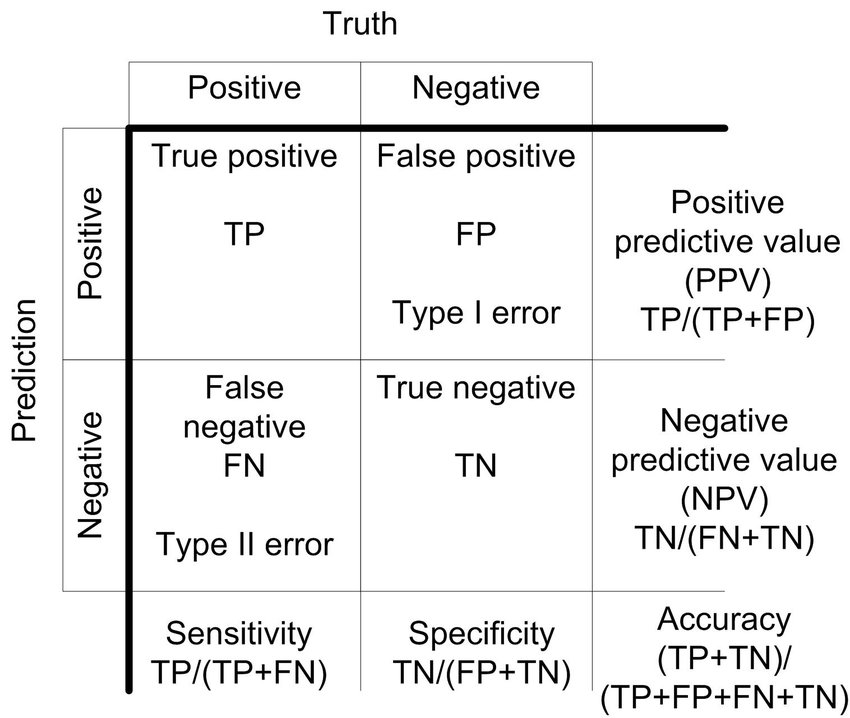



In [ ]:
# Calculate accuracy from confusion matrix
# in confusion matrix

TP = conf_matrix[1,1] # predicted_label: 1, true_label:1
FP = conf_matrix[1,0] # predicted_label: 1, true_label:0
FN = conf_matrix[0,1] # predicted_label: 0, true_label:1
TN = conf_matrix[0,0] # predicted_label: 0, true_label:0

accuracy = (TP + TN) / (TP + FP + FN + TN)

print(f"Accuracy of the model: {accuracy:.2f}")

# Transformer-Based Models

Transformer-based models represent a significant advancement in the field of natural language processing (NLP) and have become the cornerstone for a variety of applications. The architecture was introduced in the paper "Attention is All You Need" by Vaswani et al. in 2017, and since then, it has been widely adopted and extended in various ways.

Here are key components and concepts associated with Transformer-based models:

1. **Self-Attention Mechanism:**
   - The core innovation of the Transformer architecture is the self-attention mechanism, which allows the model to weigh different parts of the input sequence differently while making predictions.
   - Self-attention enables the model to consider the entire context when processing each element in the sequence, capturing long-range dependencies.

2. **Encoder-Decoder Structure:**
   - The original Transformer was designed for sequence-to-sequence tasks, such as machine translation. It consists of an encoder and a decoder.
   - The encoder processes the input sequence, while the decoder generates the output sequence.

3. **Multi-Head Attention:**
   - To enhance the self-attention mechanism, Transformer employs multiple attention heads in parallel.
   - Each attention head learns different aspects of the relationships within the input sequence, and their outputs are concatenated and linearly transformed.

4. **Positional Encoding:**
   - Transformers do not inherently capture the order of elements in a sequence, so positional encodings are added to the input embeddings to provide information about the positions of tokens.
   - Positional encodings are usually sine and cosine functions of different frequencies.

5. **Feedforward Neural Networks:**
   - Both the encoder and decoder have feedforward neural networks after the attention layers.
   - These networks process the output of the attention layers independently for each position.

6. **Layer Normalization and Residual Connections:**
   - Layer normalization is applied before the feedforward networks, and residual connections are added around both the attention and feedforward sub-layers.
   - This helps with the training of deep networks and accelerates convergence.

7. **Transformer Variants:**
   - The original Transformer model has inspired various variants and architectures.
   - BERT (Bidirectional Encoder Representations from Transformers) introduced the concept of pre-training transformer-based models on large corpora and fine-tuning them for specific tasks.
   - GPT (Generative Pre-trained Transformer) is a series of autoregressive language models that predict the next word in a sequence.
   - T5 (Text-to-Text Transfer Transformer) uses a unified transformer architecture for various NLP tasks by formulating each task as a text-to-text problem.

8. **Attention Is All You Need (AIAYN) Architecture:**
   - The architecture consists of stacked layers of self-attention and feedforward sub-layers.
   - Multi-head attention is employed to capture different aspects of relationships between words.

9. **Applications:**
   - Transformer-based models have been successful in various NLP tasks, including machine translation, text summarization, question answering, sentiment analysis, and language modeling.

10. **Large-Scale Pre-training:**
    - Large-scale pre-training on vast amounts of data has become a common practice to initialize transformer models before fine-tuning on specific tasks.
    - This has contributed to the success of transformer-based models in achieving state-of-the-art results across multiple NLP benchmarks.

Transformer-based models have not only demonstrated excellent performance but have also influenced the development of new architectures and models in other domains beyond NLP. The flexibility and scalability of the Transformer architecture make it a fundamental building block in modern deep learning.

## Document Embeddings using BERT

To generate document embeddings using a pre-trained BERT model for a corpus of three documents, you can use an approach called "pooling." In this method, you obtain embeddings for individual tokens and then aggregate them to get a fixed-size representation for the entire document. One common aggregation method is to take the mean or max pooling of the token embeddings.

Here's an example using the `transformers` library with a pre-trained BERT model for document embeddings:


In [ ]:
from transformers import BertModel, BertTokenizer
import torch

# Load pre-trained BERT model and tokenizer
model_name = "bert-base-uncased"
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertModel.from_pretrained(model_name)

# Sample corpus with three documents
corpus = [
    "This is the first document about transformers.",
    "The second document discusses BERT models.",
    "In the third document, we explore document embeddings with BERT."
]

# Tokenize and obtain embeddings for each document
document_embeddings = []

for document in corpus:
    # Tokenize the document
    tokens = tokenizer.tokenize(document)
    token_ids = tokenizer.convert_tokens_to_ids(tokens)

    # Add special tokens [CLS] and [SEP]
    token_ids = [tokenizer.cls_token_id] + token_ids + [tokenizer.sep_token_id]

    # Convert to PyTorch tensor
    input_ids = torch.tensor([token_ids])

    # Obtain embeddings for tokens
    with torch.no_grad():
        outputs = model(input_ids)

    # Use mean pooling to obtain document embeddings
    mean_pooled_embedding = torch.mean(outputs.last_hidden_state, dim=1)

    # Append the document embedding to the list
    document_embeddings.append(mean_pooled_embedding.numpy())

# Stack document embeddings into a single tensor
# document_embeddings = torch.stack(document_embeddings)

# Display the document embeddings
print("Document Embeddings:")
print(document_embeddings)


In this example:
- We use the `bert-base-uncased` model, which is a smaller and uncased variant of BERT.
- The `tokenizer.tokenize` method is applied twice to handle WordPiece tokenization.
- The mean pooling is applied to obtain document embeddings for each document.

Remember that this is a simplified example, and document embeddings can be used in various ways depending on the specific requirements of your task or analysis.

## Load Turkish Movie Reviews dataset

In [ ]:
!curl https://www.win.tue.nl/~mpechen/projects/smm/Turkish_Movie_Sentiment.zip -o ./Turkish_Movie_Sentiment.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  520k  100  520k    0     0   382k      0  0:00:01  0:00:01 --:--:--  382k


In [ ]:
!unzip /content/Turkish_Movie_Sentiment.zip -d /content

Archive:  /content/Turkish_Movie_Sentiment.zip
  inflating: /content/tr_polarity.neg  
  inflating: /content/tr_polarity.pos  


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# Generator for corpus read
import smart_open
import gensim
import re
from nltk.tokenize import word_tokenize

def read_corpus(fname, tokens_only=False):
    with smart_open.open(fname, encoding="iso-8859-9") as f:
        for i, line in enumerate(f):
            tokens = word_tokenize(re.sub('[\n\r\.]', ' ', line))
            if tokens_only:
                yield tokens
            else:
                # For training data, add tags
                yield gensim.models.doc2vec.TaggedDocument(tokens, [i])


In [ ]:
# Convert reviews to pandas dataframe
import pandas as pd

review_pos_list = read_corpus("./tr_polarity.pos", tokens_only=True);
review_neg_list = read_corpus("./tr_polarity.neg", tokens_only=True);

pos_reviews = [ [1, prev] for prev in review_pos_list];
neg_reviews = [ [0, nrev] for nrev in review_neg_list]
dataset = pd.DataFrame(pos_reviews + neg_reviews, columns=['label','review'])

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10662 entries, 0 to 10661
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   10662 non-null  int64 
 1   review  10662 non-null  object
dtypes: int64(1), object(1)
memory usage: 166.7+ KB


In [ ]:
dataset

## BERTurk

We present community-driven BERT, DistilBERT, ELECTRA and ConvBERT models for Turkish 🎉

Some datasets used for pretraining and evaluation are contributed from the awesome Turkish NLP community, as well as the decision for the BERT model name: BERTurk. [github](https://github.com/stefan-it/turkish-bert?ysclid=lprfjmwx3331661850)

[Model Usage](https://github.com/stefan-it/turkish-bert?ysclid=lprfjmwx3331661850)

All trained models can be used from the DBMDZ Hugging Face model hub page using their model name. The following models are available:

* BERTurk models with 32k vocabulary: ```dbmdz/bert-base-turkish-cased``` and ```dbmdz/bert-base-turkish-uncased```

* BERTurk models with 128k vocabulary: ```dbmdz/bert-base-turkish-128k-cased``` and ```dbmdz/bert-base-turkish-128k-uncased```

* ELECTRA small and base cased models (discriminator): ```dbmdz/electra-small-turkish-cased-discriminator``` and ```dbmdz/electra-base-turkish-cased-discriminator```

* ELECTRA base cased and uncased models, trained on Turkish part of mC4 corpus (discriminator): ```dbmdz/electra-small-turkish-mc4-cased-discriminator``` and ```dbmdz/electra-small-turkish-mc4-uncased-discriminator```

* ConvBERTurk model with 32k vocabulary: ```dbmdz/convbert-base-turkish-cased```

* ConvBERTurk base cased and uncased models, trained on Turkish part of mC4 corpus: ```dbmdz/convbert-base-turkish-mc4-cased``` and ```dbmdz/convbert-base-turkish-mc4-uncased```

> Example usage with 🤗/Transformers:

```python
from transformers import AutoModel, AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("dbmdz/bert-base-turkish-cased")
model = AutoModel.from_pretrained("dbmdz/bert-base-turkish-cased")
```
This loads the BERTurk cased model. The recently introduced ELECTRA base model can be loaded with:

```python
from transformers import AutoModel, AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("dbmdz/electra-base-turkish-cased-discriminator")
model = AutoModelWithLMHead.from_pretrained("dbmdz/electra-base-turkish-cased-discriminator")
```

In [ ]:
from transformers import AutoModel, AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("dbmdz/distilbert-base-turkish-cased")
bert_model = AutoModel.from_pretrained("dbmdz/distilbert-base-turkish-cased")

tokenizer_config.json:   0%|          | 0.00/60.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/410 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/251k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/273M [00:00<?, ?B/s]

In [ ]:
import torch

# Sample corpus with three documents
corpus = [' '.join(review[1]) for review in pos_reviews[:3]]

# Tokenize and obtain embeddings for each document
document_embeddings = []

for document in corpus:
    # Tokenize the document
    tokens = tokenizer.tokenize(document)
    token_ids = tokenizer.convert_tokens_to_ids(tokens)

    # Add special tokens [CLS] and [SEP]
    token_ids = [tokenizer.cls_token_id] + token_ids + [tokenizer.sep_token_id]

    # Convert to PyTorch tensor
    input_ids = torch.tensor([token_ids])

    # Obtain embeddings for tokens
    with torch.no_grad():
        outputs = bert_model(input_ids)

    # Use mean pooling to obtain document embeddings
    mean_pooled_embedding = torch.mean(outputs.last_hidden_state, dim=1)

    # Append the document embedding to the list
    document_embeddings.append(mean_pooled_embedding.numpy())

# Stack document embeddings into a single tensor
# document_embeddings = torch.stack(document_embeddings)

# Display the document embeddings
print(f"Doc_vector_size: {document_embeddings[0].shape[1]}")
print("Document Embeddings:")
print(document_embeddings[0])


Doc_vector_size: 768
Document Embeddings:
[[ 5.21373153e-02  1.15604056e-02  9.12505016e-02  6.44875541e-02
  -3.55194025e-02  1.35166526e-01  9.43079069e-02 -8.58407691e-02
  -1.40626296e-01  1.95601538e-01 -1.38910949e-01  7.56160170e-02
  -4.11905289e-01 -5.52591830e-02 -9.66780558e-02  8.60569924e-02
   7.10794404e-02  3.53833102e-02  6.74648657e-02 -9.21218321e-02
   1.10189244e-01  1.33715019e-01 -2.88392901e-01  5.38113527e-02
   7.98991099e-02  1.77603528e-01  3.46888937e-02  1.73387930e-01
  -1.66290045e-01 -1.55277148e-01 -1.35368049e-01 -4.34613377e-02
  -1.39003042e-02  1.54694155e-01  9.21628922e-02  4.50359238e-03
  -9.23229232e-02 -3.73730925e-03 -5.99797331e-02  7.11603761e-02
  -7.76668414e-02 -6.01182990e-02 -1.97291866e-01 -5.82958274e-02
   2.26410180e-01 -9.33232531e-02  2.37682834e-01 -4.47190285e-01
  -3.52993258e-03 -9.24124289e-03  1.75862104e-01  1.51409460e-02
   8.47522095e-02  2.14139909e-01 -1.51609451e-01  1.04194656e-01
   4.10469435e-02  4.39111106e-02 